In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#loading info from Open Phoenix website - census stuff from class

precincts = "Police_Precincts.zip"
precincts_gdf = gpd.read_file(precincts)

beats = "Police_Beats.zip"
beats_gdf = gpd.read_file(beats)

census_blocks = "tl_2023_04_bg.zip"
c_blocks_gdf = gpd.read_file(census_blocks)

c_blocks_gdf2 = c_blocks_gdf.loc[c_blocks_gdf["COUNTYFP"] == "013"]


<Axes: >

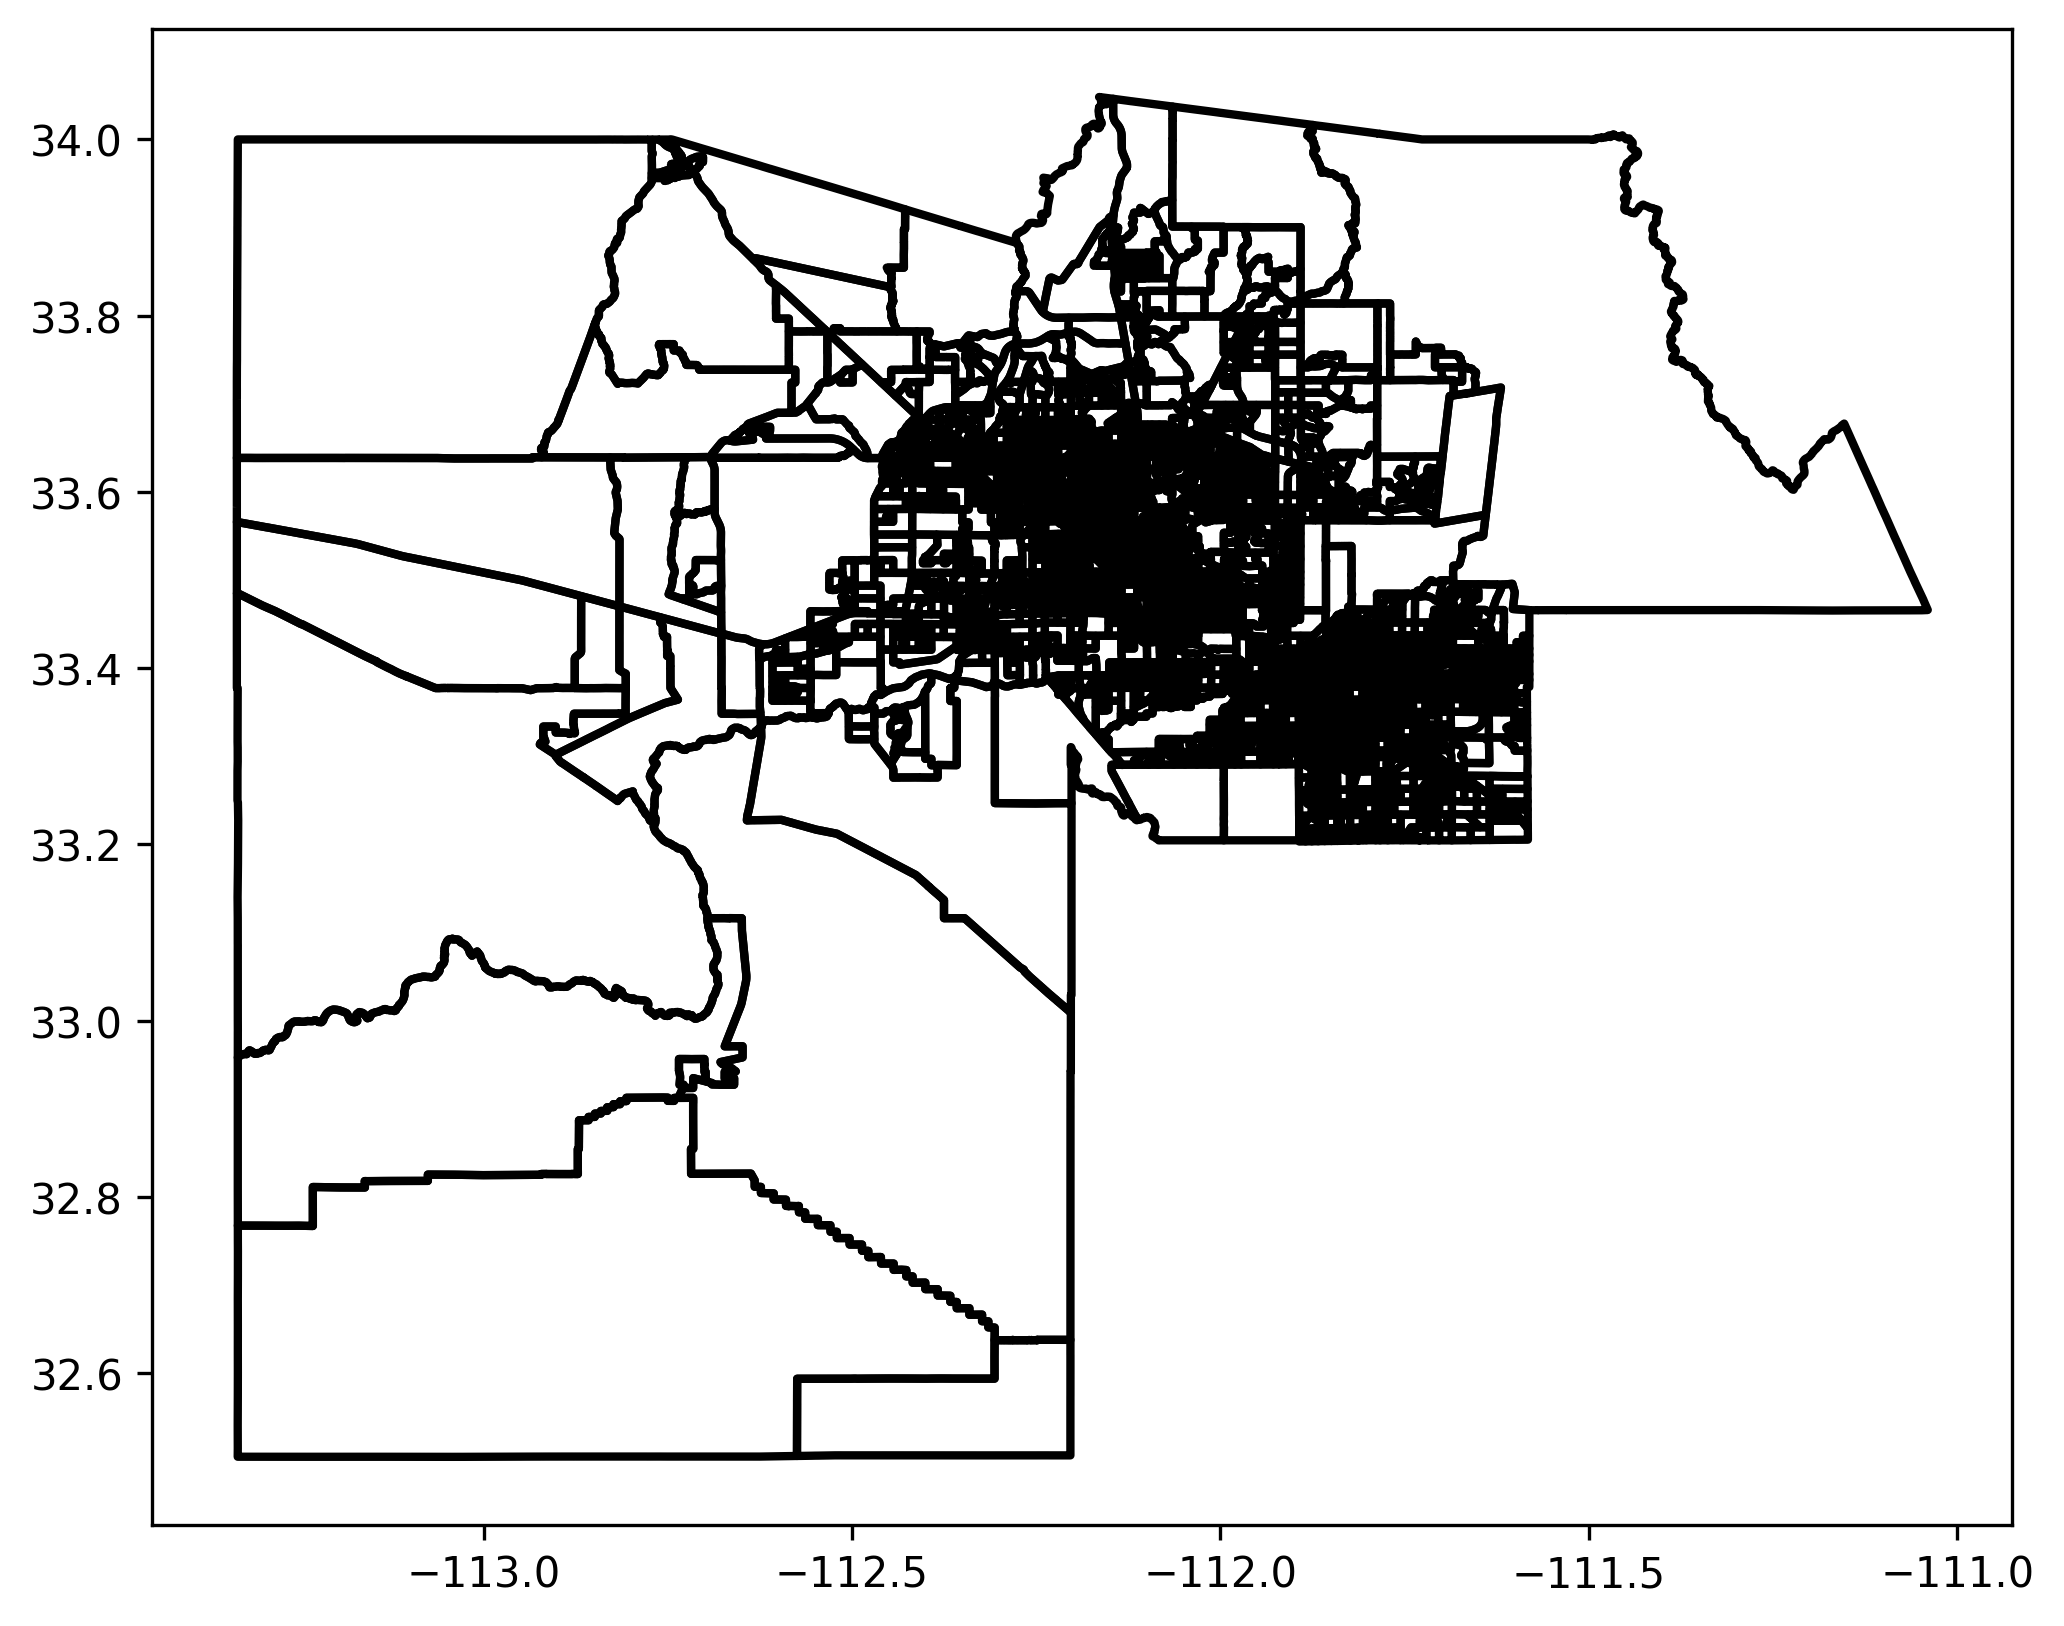

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)

c_blocks_gdf2.plot(ax=ax1, facecolor='none', linewidth=2)

<Axes: >

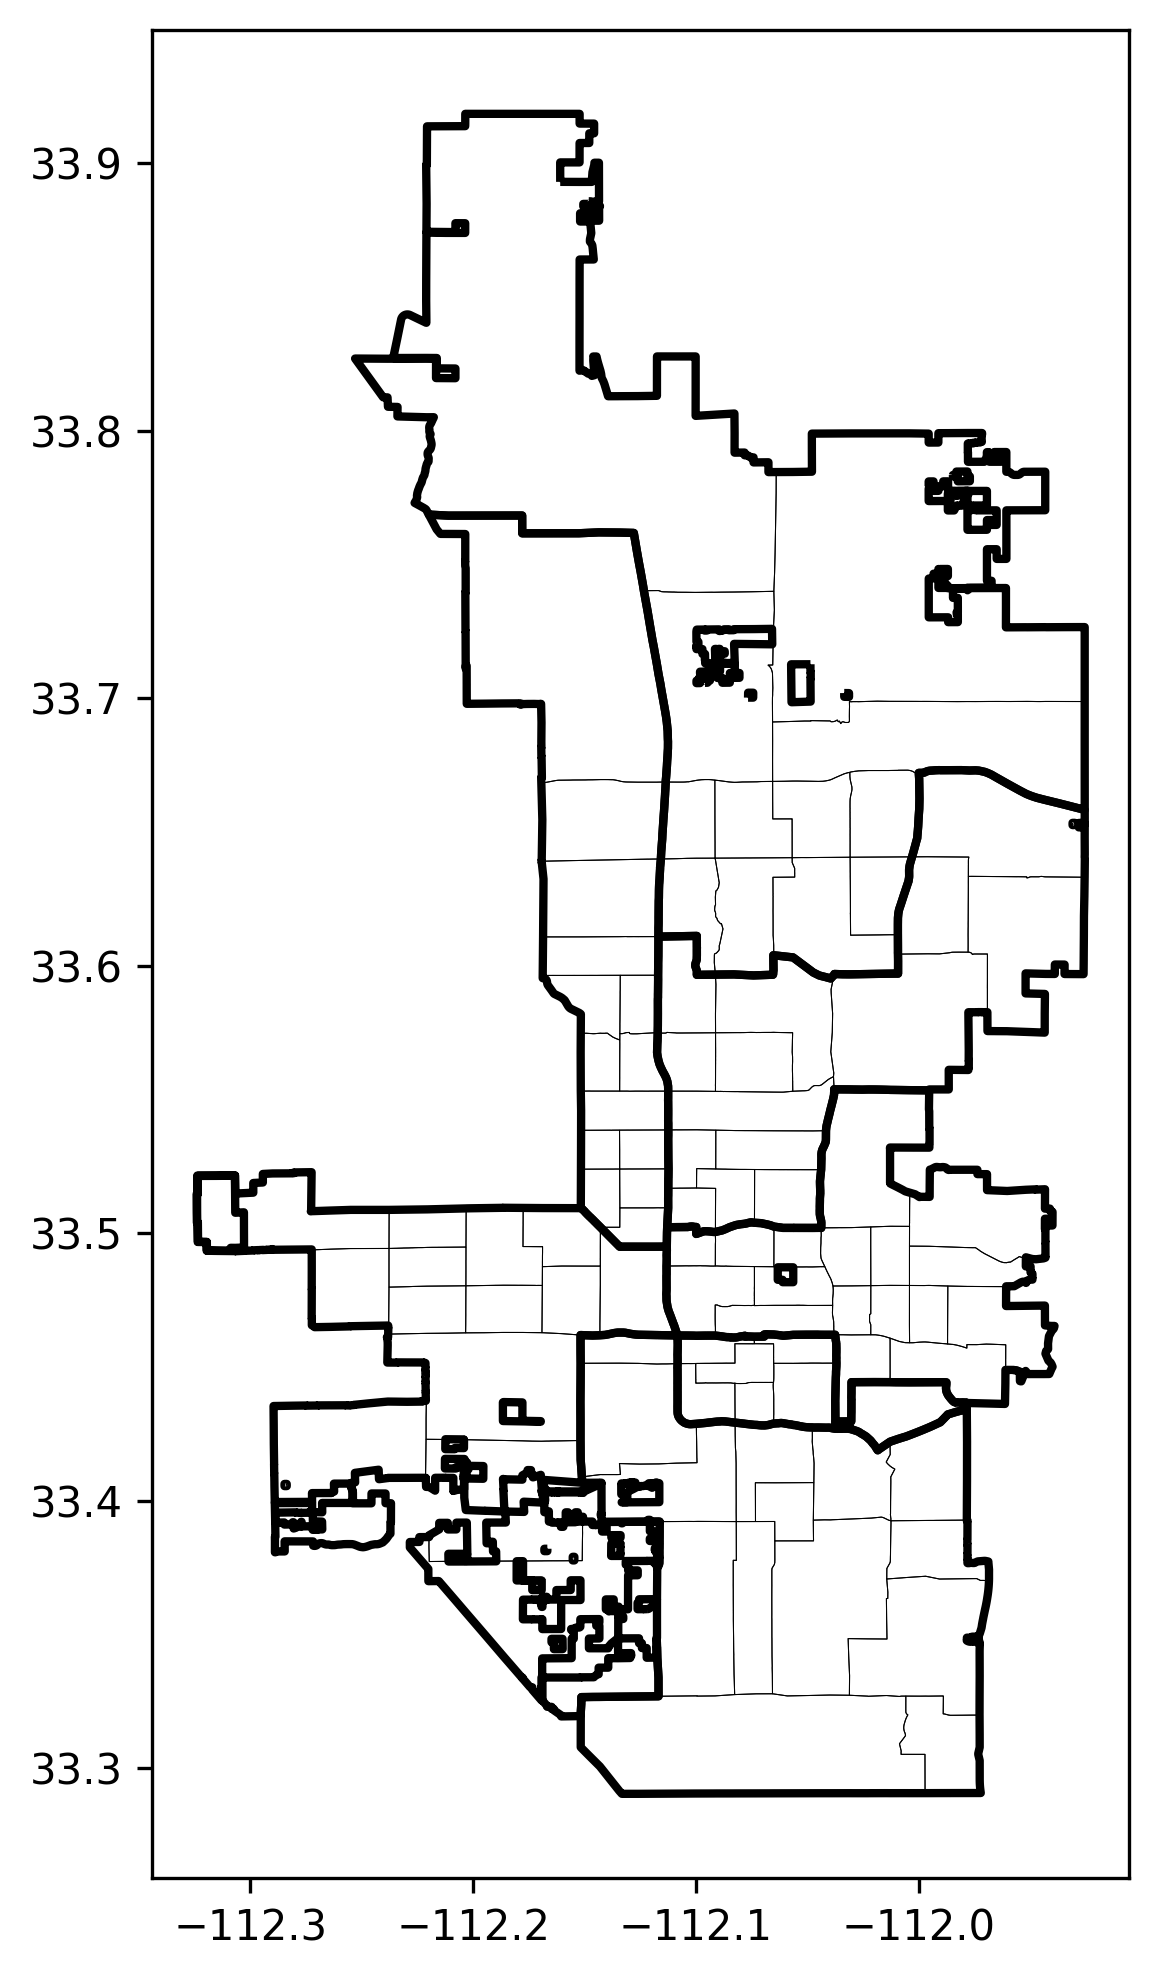

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)

precincts_gdf.plot(ax=ax1, facecolor='none', linewidth=2)
beats_gdf.plot(ax=ax1, facecolor='none', linewidth=.25)

In [ ]:
precincts_gdf2= precincts_gdf.to_crs(c_blocks_gdf2.crs)
beats_gdf2 = beats_gdf.to_crs(c_blocks_gdf2.crs)


#rigt
phoenix_cb_gdf = gpd.overlay(c_blocks_gdf2, precincts_gdf2, how="intersection")

In [ ]:
#phoenix_cb_gdf.GEOID.value_counts() - this may indicate some level of double counting right now - not sure
#next would be to try this same after the centroid method

040131168002    4
040131172001    4
040131090011    3
040131172003    3
040131172002    3
               ..
040133197082    1
040131157001    1
040131167381    1
040131167372    1
040136130001    1
Name: GEOID, Length: 1128, dtype: int64

In [ ]:
# figure out what's in phoenix_cb_gdf at this point
# could i try just overlaying this with beats to see if this works?

#phoenix_cb_gdf.head(5)

#phoenix_cb_gdf = gpd.overlay(phoenix_cb_gdf, beats_gdf2, how="intersection")

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1803: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
<ipython-input-20-3595f025ab62>:6: UserWarning: `keep_geom_type=True` in overlay resulted in 452 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  phoenix_cb_gdf = gpd.overlay(phoenix_cb_gdf, beats_gdf2, how="intersection")


In [ ]:
phoenix_cb_gdf.head(5)
# just the overlay didn't work bc i think it doubled counted census groups that are in multiple precincts


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,OBJECTID,NAME,SE_ANNO_CA,SHAPEAREA,SHAPELEN,geometry
0,04,013,105101,1,040131051011,1500000US040131051011,Block Group 1,G5030,S,1918026,0,+33.5760247,-112.0024737,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.01268 33.57706, -112.01247 33.5..."
1,04,013,103210,1,040131032101,1500000US040131032101,Block Group 1,G5030,S,294176,0,+33.6082925,-111.9800557,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-111.98151 33.61161, -111.97857 33.6..."
2,04,013,103302,2,040131033022,1500000US040131033022,Block Group 2,G5030,S,755128,0,+33.6168596,-111.9996635,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00463 33.61904, -112.00455 33.6..."
3,04,013,103400,4,040131034004,1500000US040131034004,Block Group 4,G5030,S,748584,4799,+33.5998522,-112.0019637,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00933 33.60429, -112.00928 33.6..."
4,04,013,104402,2,040131044022,1500000US040131044022,Block Group 2,G5030,S,2320276,25320,+33.5792297,-112.1095653,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.11723 33.56903, -112.11712 33.5..."


In [ ]:
#fig1, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)

#phoenix_cb_gdf.plot(ax=ax1, facecolor='none', linewidth=.25, edgecolor="red")
#precincts_gdf2.plot(ax=ax1, facecolor='none', linewidth=2, edgecolor="green")
#beats_gdf2.plot(ax=ax1, facecolor='none', linewidth=1, edgecolor="blue")

In [ ]:
phoenix_cb_gdf["Centroid"] = phoenix_cb_gdf["geometry"].centroid


phoenix_cb_gdf.head(5)

<ipython-input-12-71b0bf650c4b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  phoenix_cb_gdf["Centroid"] = phoenix_cb_gdf["geometry"].centroid


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,OBJECTID,NAME,SE_ANNO_CA,SHAPEAREA,SHAPELEN,geometry,Centroid
0,04,013,105101,1,040131051011,1500000US040131051011,Block Group 1,G5030,S,1918026,0,+33.5760247,-112.0024737,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.01268 33.57706, -112.01247 33.5...",POINT (-112.00247 33.57602)
1,04,013,103210,1,040131032101,1500000US040131032101,Block Group 1,G5030,S,294176,0,+33.6082925,-111.9800557,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-111.98151 33.61161, -111.97857 33.6...",POINT (-111.98006 33.60829)
2,04,013,103302,2,040131033022,1500000US040131033022,Block Group 2,G5030,S,755128,0,+33.6168596,-111.9996635,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00463 33.61904, -112.00455 33.6...",POINT (-111.99966 33.61686)
3,04,013,103400,4,040131034004,1500000US040131034004,Block Group 4,G5030,S,748584,4799,+33.5998522,-112.0019637,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00933 33.60429, -112.00928 33.6...",POINT (-112.00391 33.60003)
4,04,013,104402,2,040131044022,1500000US040131044022,Block Group 2,G5030,S,2320276,25320,+33.5792297,-112.1095653,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.11723 33.56903, -112.11712 33.5...",POINT (-112.10888 33.57526)


In [ ]:
joined_gdf = gpd.sjoin(phoenix_cb_gdf.set_geometry('Centroid'), precincts_gdf2[["NAME", "geometry"]], how="left", op="within")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
joined_gdf.head(5)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,INTPTLON,OBJECTID,NAME_left,SE_ANNO_CA,SHAPEAREA,SHAPELEN,geometry,Centroid,index_right,NAME_right
0,04,013,105101,1,040131051011,1500000US040131051011,Block Group 1,G5030,S,1918026,...,-112.0024737,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.01268 33.57706, -112.01247 33.5...",POINT (-112.00247 33.57602),2.0,Desert Horizon Precinct
1,04,013,103210,1,040131032101,1500000US040131032101,Block Group 1,G5030,S,294176,...,-111.9800557,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-111.98151 33.61161, -111.97857 33.6...",POINT (-111.98006 33.60829),2.0,Desert Horizon Precinct
2,04,013,103302,2,040131033022,1500000US040131033022,Block Group 2,G5030,S,755128,...,-111.9996635,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00463 33.61904, -112.00455 33.6...",POINT (-111.99966 33.61686),2.0,Desert Horizon Precinct
3,04,013,103400,4,040131034004,1500000US040131034004,Block Group 4,G5030,S,748584,...,-112.0019637,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00933 33.60429, -112.00928 33.6...",POINT (-112.00391 33.60003),2.0,Desert Horizon Precinct
4,04,013,104402,2,040131044022,1500000US040131044022,Block Group 2,G5030,S,2320276,...,-112.1095653,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.11723 33.56903, -112.11712 33.5...",POINT (-112.10888 33.57526),2.0,Desert Horizon Precinct


In [ ]:
joined_gdf.NAME_right.value_counts()

Desert Horizon Precinct             235
Black Mountain Precinct             219
Maryvale/Estrella Precinct          201
Mountain View Precinct              184
Cactus Park Precinct                180
South Mountain Precinct             177
Central City Precinct                47
Sky Harbor International Airport      9
Name: NAME_right, dtype: int64

040131168002    4
040131172001    4
040131090011    3
040131172003    3
040131172002    3
               ..
040133197082    1
040131157001    1
040131167381    1
040131167372    1
040136130001    1
Name: GEOID, Length: 1128, dtype: int64

In [ ]:
joined_gdf.NAME_left.value_counts()

# issues 7 - Desert Horizon, 5 Black Mountain, 10 Maryvale, 2 Mountain View, 4 Cactus Park, 1 Central City, 2 Sky Harbor

Desert Horizon Precinct             242
Black Mountain Precinct             224
Maryvale/Estrella Precinct          211
Mountain View Precinct              186
Cactus Park Precinct                184
South Mountain Precinct             177
Central City Precinct                48
Sky Harbor International Airport     11
Name: NAME_left, dtype: int64

In [ ]:
# find centroids of each NA values to make sure that they exist
# want to find the

In [ ]:
joined_gdf = joined_gdf.drop(columns=['index_right'])

In [ ]:
joined_gdf2 = gpd.sjoin(joined_gdf.set_geometry('Centroid'), beats_gdf2[["BEAT", "geometry"]], how="left", op="within")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
joined_gdf2.head(5)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,OBJECTID,NAME_left,SE_ANNO_CA,SHAPEAREA,SHAPELEN,geometry,Centroid,NAME_right,index_right,BEAT
0,04,013,105101,1,040131051011,1500000US040131051011,Block Group 1,G5030,S,1918026,...,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.01268 33.57706, -112.01247 33.5...",POINT (-112.00247 33.57602),Desert Horizon Precinct,59.0,634.0
1,04,013,103210,1,040131032101,1500000US040131032101,Block Group 1,G5030,S,294176,...,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-111.98151 33.61161, -111.97857 33.6...",POINT (-111.98006 33.60829),Desert Horizon Precinct,57.0,632.0
2,04,013,103302,2,040131033022,1500000US040131033022,Block Group 2,G5030,S,755128,...,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00463 33.61904, -112.00455 33.6...",POINT (-111.99966 33.61686),Desert Horizon Precinct,57.0,632.0
3,04,013,103400,4,040131034004,1500000US040131034004,Block Group 4,G5030,S,748584,...,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.00933 33.60429, -112.00928 33.6...",POINT (-112.00391 33.60003),Desert Horizon Precinct,59.0,634.0
4,04,013,104402,2,040131044022,1500000US040131044022,Block Group 2,G5030,S,2320276,...,2891,Desert Horizon Precinct,None,0,0,"POLYGON ((-112.11723 33.56903, -112.11712 33.5...",POINT (-112.10888 33.57526),Desert Horizon Precinct,51.0,621.0


<Axes: >

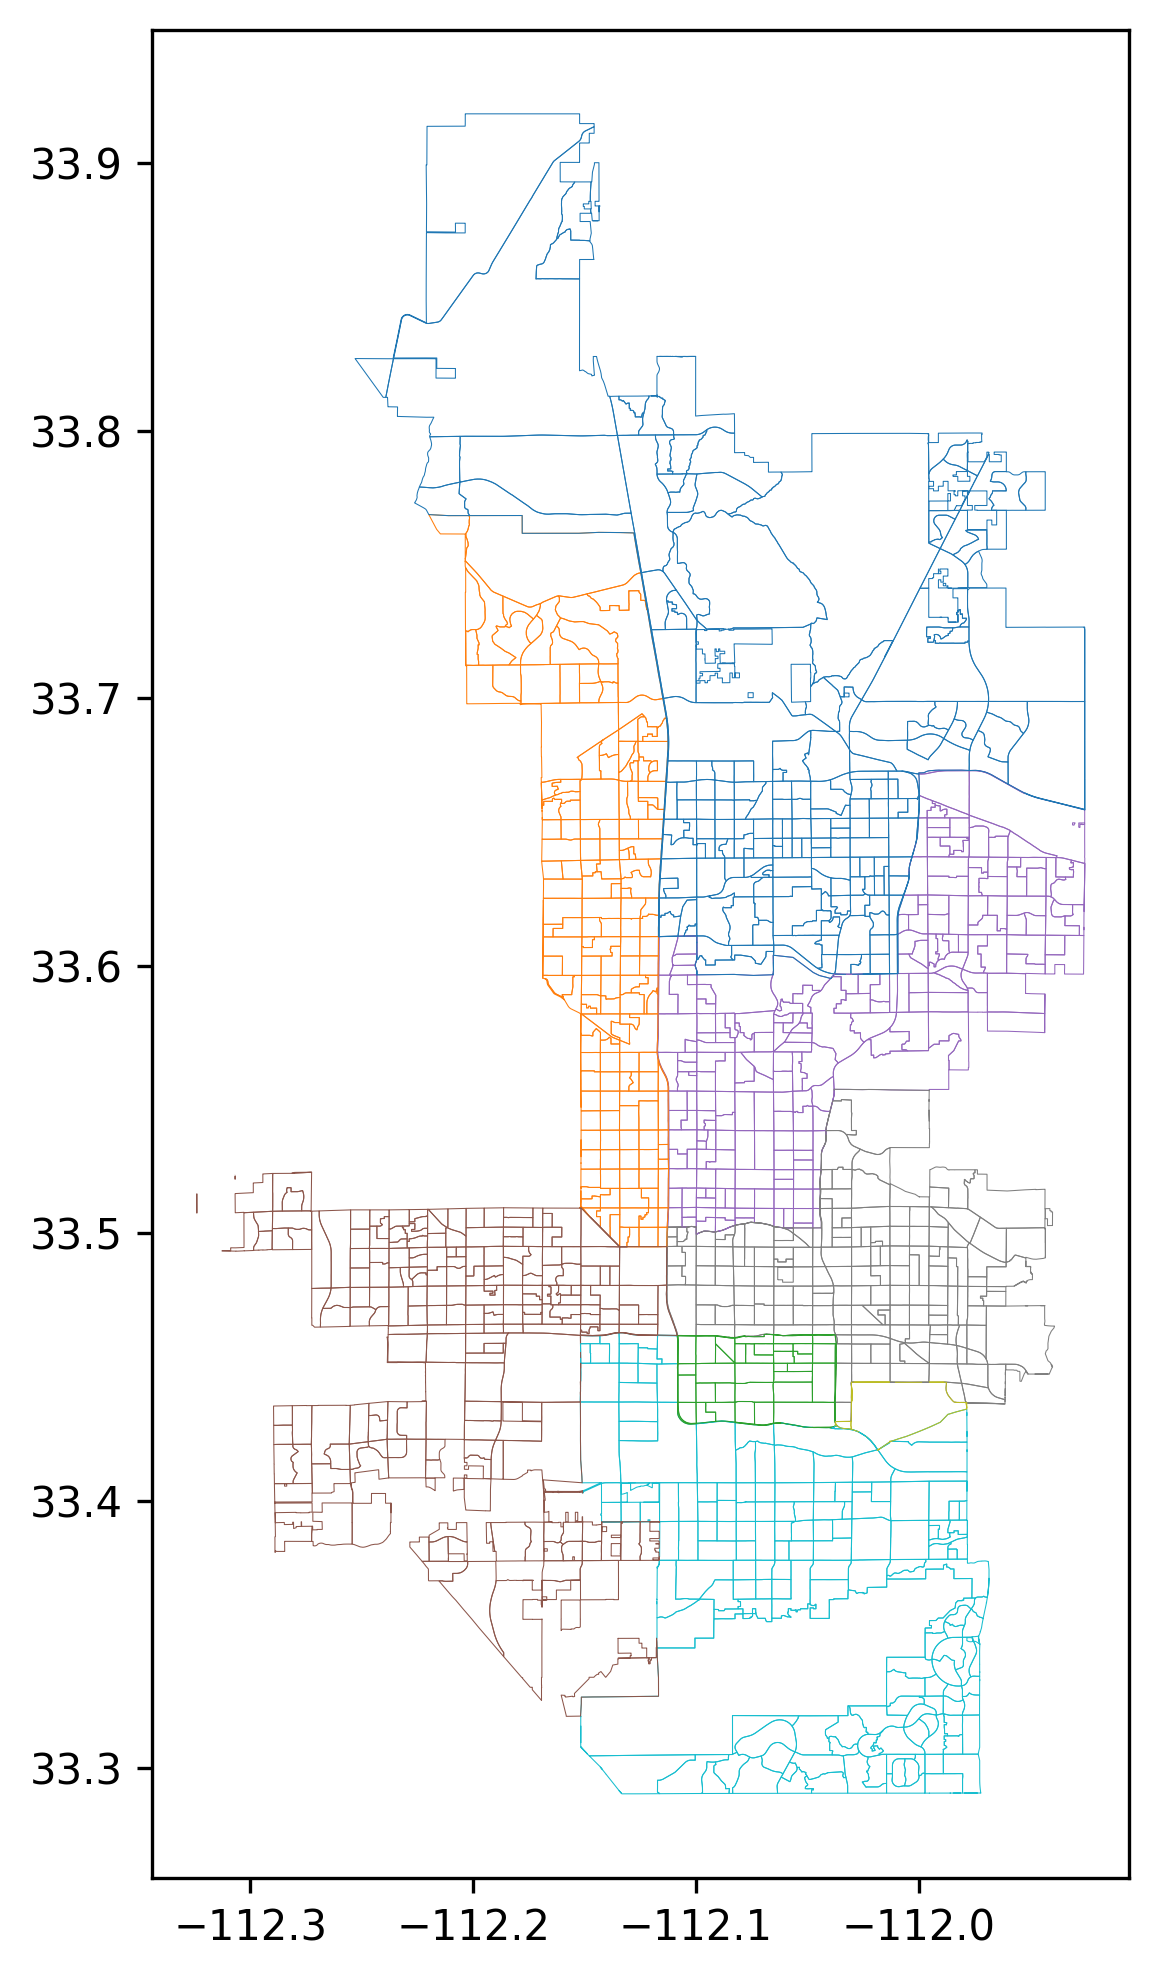

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)

joined_gdf2.set_geometry('geometry').plot(ax=ax1, column='NAME_right', facecolor='none', linewidth=.25)

In [ ]:
# remove all unnecessary columns from my joined_df to make it more useful
# remove where null values

In [ ]:
joined_gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1283 entries, 0 to 1282
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STATEFP      1283 non-null   object  
 1   COUNTYFP     1283 non-null   object  
 2   TRACTCE      1283 non-null   object  
 3   BLKGRPCE     1283 non-null   object  
 4   GEOID        1283 non-null   object  
 5   GEOIDFQ      1283 non-null   object  
 6   NAMELSAD     1283 non-null   object  
 7   MTFCC        1283 non-null   object  
 8   FUNCSTAT     1283 non-null   object  
 9   ALAND        1283 non-null   int64   
 10  AWATER       1283 non-null   int64   
 11  INTPTLAT     1283 non-null   object  
 12  INTPTLON     1283 non-null   object  
 13  OBJECTID     1283 non-null   int64   
 14  NAME_left    1283 non-null   object  
 15  SE_ANNO_CA   0 non-null      object  
 16  SHAPEAREA    1283 non-null   int64   
 17  SHAPELEN     1283 non-null   int64   
 18  geometry     1283 no

In [ ]:
joined_gdf2 = joined_gdf2.drop(columns=['index_right', 'NAME_left', 'index_right', 'SE_ANNO_CA'])

In [ ]:
joined_gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1283 entries, 0 to 1282
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     1283 non-null   object  
 1   COUNTYFP    1283 non-null   object  
 2   TRACTCE     1283 non-null   object  
 3   BLKGRPCE    1283 non-null   object  
 4   GEOID       1283 non-null   object  
 5   GEOIDFQ     1283 non-null   object  
 6   NAMELSAD    1283 non-null   object  
 7   MTFCC       1283 non-null   object  
 8   FUNCSTAT    1283 non-null   object  
 9   ALAND       1283 non-null   int64   
 10  AWATER      1283 non-null   int64   
 11  INTPTLAT    1283 non-null   object  
 12  INTPTLON    1283 non-null   object  
 13  OBJECTID    1283 non-null   int64   
 14  SHAPEAREA   1283 non-null   int64   
 15  SHAPELEN    1283 non-null   int64   
 16  geometry    1283 non-null   geometry
 17  Centroid    1283 non-null   geometry
 18  NAME_right  1252 non-null   object  
 19

In [ ]:
joined_gdf2 = joined_gdf2.dropna(subset=['NAME_right'])
joined_gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1252 entries, 0 to 1282
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     1252 non-null   object  
 1   COUNTYFP    1252 non-null   object  
 2   TRACTCE     1252 non-null   object  
 3   BLKGRPCE    1252 non-null   object  
 4   GEOID       1252 non-null   object  
 5   GEOIDFQ     1252 non-null   object  
 6   NAMELSAD    1252 non-null   object  
 7   MTFCC       1252 non-null   object  
 8   FUNCSTAT    1252 non-null   object  
 9   ALAND       1252 non-null   int64   
 10  AWATER      1252 non-null   int64   
 11  INTPTLAT    1252 non-null   object  
 12  INTPTLON    1252 non-null   object  
 13  OBJECTID    1252 non-null   int64   
 14  SHAPEAREA   1252 non-null   int64   
 15  SHAPELEN    1252 non-null   int64   
 16  geometry    1252 non-null   geometry
 17  Centroid    1252 non-null   geometry
 18  NAME_right  1252 non-null   object  
 19

In [ ]:
joined_gdf2 = joined_gdf2.rename(columns={'NAME_right': 'PRECINCT'})
joined_gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1252 entries, 0 to 1282
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   STATEFP    1252 non-null   object  
 1   COUNTYFP   1252 non-null   object  
 2   TRACTCE    1252 non-null   object  
 3   BLKGRPCE   1252 non-null   object  
 4   GEOID      1252 non-null   object  
 5   GEOIDFQ    1252 non-null   object  
 6   NAMELSAD   1252 non-null   object  
 7   MTFCC      1252 non-null   object  
 8   FUNCSTAT   1252 non-null   object  
 9   ALAND      1252 non-null   int64   
 10  AWATER     1252 non-null   int64   
 11  INTPTLAT   1252 non-null   object  
 12  INTPTLON   1252 non-null   object  
 13  OBJECTID   1252 non-null   int64   
 14  SHAPEAREA  1252 non-null   int64   
 15  SHAPELEN   1252 non-null   int64   
 16  geometry   1252 non-null   geometry
 17  Centroid   1252 non-null   geometry
 18  PRECINCT   1252 non-null   object  
 19  BEAT       1252 non

In [ ]:
joined_gdf2 = joined_gdf2.set_geometry('geometry')

In [ ]:
joined_gdf2.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,OBJECTID,SHAPEAREA,SHAPELEN,geometry,Centroid,PRECINCT,BEAT
0,04,013,105101,1,040131051011,1500000US040131051011,Block Group 1,G5030,S,1918026,0,+33.5760247,-112.0024737,2891,0,0,"POLYGON ((-112.01268 33.57706, -112.01247 33.5...",POINT (-112.00247 33.57602),Desert Horizon Precinct,634.0
1,04,013,103210,1,040131032101,1500000US040131032101,Block Group 1,G5030,S,294176,0,+33.6082925,-111.9800557,2891,0,0,"POLYGON ((-111.98151 33.61161, -111.97857 33.6...",POINT (-111.98006 33.60829),Desert Horizon Precinct,632.0
2,04,013,103302,2,040131033022,1500000US040131033022,Block Group 2,G5030,S,755128,0,+33.6168596,-111.9996635,2891,0,0,"POLYGON ((-112.00463 33.61904, -112.00455 33.6...",POINT (-111.99966 33.61686),Desert Horizon Precinct,632.0
3,04,013,103400,4,040131034004,1500000US040131034004,Block Group 4,G5030,S,748584,4799,+33.5998522,-112.0019637,2891,0,0,"POLYGON ((-112.00933 33.60429, -112.00928 33.6...",POINT (-112.00391 33.60003),Desert Horizon Precinct,634.0
4,04,013,104402,2,040131044022,1500000US040131044022,Block Group 2,G5030,S,2320276,25320,+33.5792297,-112.1095653,2891,0,0,"POLYGON ((-112.11723 33.56903, -112.11712 33.5...",POINT (-112.10888 33.57526),Desert Horizon Precinct,621.0


In [ ]:
joined_gdf2 = joined_gdf2.drop(columns=['Centroid'])


In [ ]:
joined_gdf2.PRECINCT.value_counts()

Desert Horizon Precinct             235
Black Mountain Precinct             219
Maryvale/Estrella Precinct          201
Mountain View Precinct              184
Cactus Park Precinct                180
South Mountain Precinct             177
Central City Precinct                47
Sky Harbor International Airport      9
Name: PRECINCT, dtype: int64

In [ ]:
joined_gdf2.to_file("police_geo_phx.geojson", driver='GeoJSON')